# 01 회귀 소개

## Ex1. y = 4X+6, 단순 선형 회귀

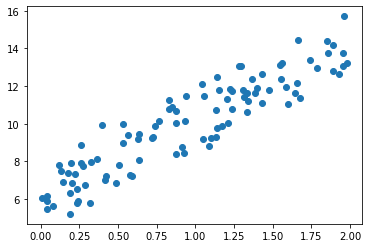

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦

X = 2*np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각회
plt.scatter(X, y)

In [46]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [47]:
# w1와 w0를 업데이트 할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열을 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [48]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0, w1 = np.zeros((1,1)), np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [49]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print("Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


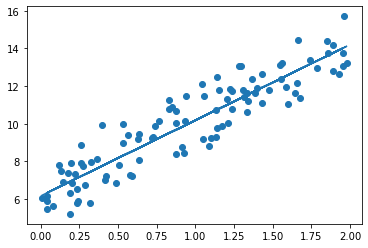

In [50]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [51]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [52]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0]*X + w0
print("Stochastic Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 05 다항 회귀와 과(대)적합/과소적합 이해

* PolynomialFeatures class를 통해 피처를 Polynomial(다항식) 피처로 변환함
* PolynomialFeatures class는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환함
* 다른 전처리 변환 클래스와 마찬가지로 PolynomialFeatures 클래스는 fit(), transform() 메서드를 통해 이와 같은 변환 작업 수행
* ex) [x1,x2] → [1,x1,x2,(x1)^2,x1x2,(x2)^2]

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 다항식으로 변환된 단항식 생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피처:\n", X)

# degree =2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n", poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [57]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 feature: \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값: \n", y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [58]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항식 계수 feature: \n", poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀 계수\n", np.round(model.coef_, 2))
print("Polynomial 회귀 Shape:", model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print("Polynomial 회귀 계수\n", np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합 및 과적합 이해

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232057 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898890e+05 -1.87415330e+06  2.03715477e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08] 입니다.
Degree 15 MSE는 180513241.13490218 입니다.


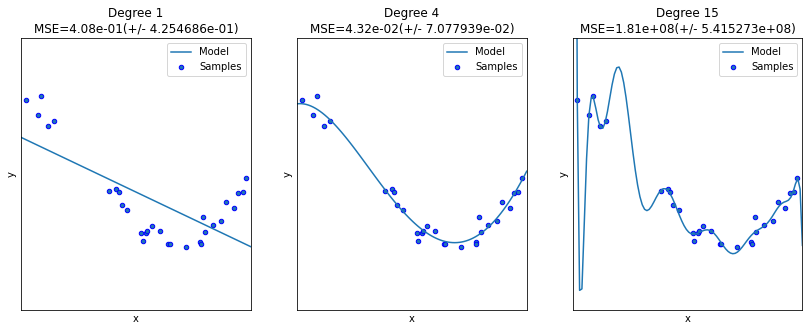

In [69]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교함
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients,2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행함
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교함
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE={:.2e}(+/- {:2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

#### 편향-분산 트레이드오프(Bias-Variance Trade off)

## 선형 회귀 모델을 위한 데이터 변환

* 선형 모델: feature와 target 간의 선형의 관계가 있다고 가정 → 최적의 선형함수를 찾아내 결과값을 예측
* 선형 회귀 모델: feature값, target값의 분포가 정규분포형태를 매우 선호
* target값, 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높음
* feature값, target값 보다는 덜하지만 역시 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있음
* 따라서, 선형회귀모델을 적용하기 전에 분포도가 심하게 왜곡된 경우 데이터에 대한 스케일링/정규화 작업을 수행함 (무조건적인 성능 향상을 보장하지는 않음)


* 스케일링/정규화 작업  
    1) StandardScaler클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행함  
    2) 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법임. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용함.  
    3) 원래 값에 log함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨. 이러한 변환을 log 변환이라고 부름. 로그 변환은 매우 유용한 변환이며, 실제로 선형 회귀에서는 앞에서 소개한 1,2 번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법임. 왜냐하면 1번 방법의 경우, 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어서 과적합의 이슈가 발생할 수 있기 때문